In [1]:
import pandas as pd

import spotify
import utils

sp = spotify.login(scope='playlist-modify-private')
user = sp.current_user()
displayName = user['display_name']
print(sp.recommendation_genre_seeds()['genres'])

['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient', 'anime', 'black-metal', 'bluegrass', 'blues', 'bossanova', 'brazil', 'breakbeat', 'british', 'cantopop', 'chicago-house', 'children', 'chill', 'classical', 'club', 'comedy', 'country', 'dance', 'dancehall', 'death-metal', 'deep-house', 'detroit-techno', 'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm', 'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk', 'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove', 'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle', 'heavy-metal', 'hip-hop', 'holidays', 'honky-tonk', 'house', 'idm', 'indian', 'indie', 'indie-pop', 'industrial', 'iranian', 'j-dance', 'j-idol', 'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino', 'malay', 'mandopop', 'metal', 'metal-misc', 'metalcore', 'minimal-techno', 'movies', 'mpb', 'new-age', 'new-release', 'opera', 'pagode', 'party', 'philippines-opm', 'piano', 'pop', 'pop-film', 'post-dubstep', 'power-po

In [4]:
preferred_genres = ['afrobeat', 'alt-rock', 'alternative','bluegrass', 'blues', 'bossanova', 
                    'dancehall', 'deep-house', 'disco', 'drum-and-bass', 'dub', 'dubstep', 
                    'funk', 'groove', 'hard-rock', 'house', 'indie', 'indie-pop', 'punk-rock', 
                    'reggae', 'rock', 'rock-n-roll', 'rockabilly', 'ska', 'soul', 'trip-hop']

In [31]:
# target_bpm = 110.0
# bpm_bandwidth = 10.0
min_tempo = 120.0
max_tempo = 130.0
query = {
    'seed_genres': ['alt-rock', 'bluegrass'],
    'limit': 20,
    'country': 'CH',
}
track_attributes = {
#     'min_tempo': target_bpm - (bpm_bandwidth / 2),
#     'max_tempo': target_bpm + (bpm_bandwidth / 2),
    'min_tempo': min_tempo,
    'max_tempo': max_tempo,
    'min_danceability': 0.66,
    'max_liveness': 0.33,
    'max_speechiness': 0.33,
    'max_instrumentalness': 0.33,
    'max_acousticness': 0.33,
    'target_time_signature': 4,
    'min_valence': 0.5,
    'min_popularity': 1,
}
response = sp.recommendations(**query, **track_attributes)
tracks = response['tracks']
len(tracks)

7

In [32]:
response.keys()

dict_keys(['tracks', 'seeds'])

In [33]:
response['seeds']

[{'initialPoolSize': 500,
  'afterFilteringSize': 5,
  'afterRelinkingSize': 5,
  'id': 'alt-rock',
  'type': 'GENRE',
  'href': None},
 {'initialPoolSize': 1000,
  'afterFilteringSize': 2,
  'afterRelinkingSize': 2,
  'id': 'bluegrass',
  'type': 'GENRE',
  'href': None}]

In [26]:
tracklist = []
for track in tracks:
    tracklist.append({
        'id': track['id'],
        'name': track['name'],
        'artist_id': track['artists'][0]['id'],
        'artist_name': track['artists'][0]['name'],
        'popularity': track['popularity'],
    })
df = pd.DataFrame(tracklist)

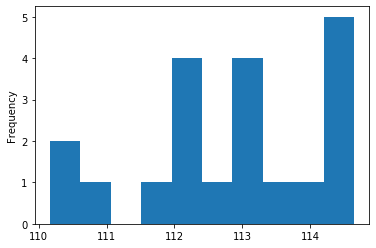

In [6]:
df

In [7]:
df

,id,name,artist_id,artist_name,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,4yKZACkuudvfd600H2dQie,Get Down On It,3VNITwohbvU5Wuy5PC6dsI,Kool & The Gang,69,0.879,0.626,7,-6.344,1,0.0604,0.20500,0.000061,0.0560,0.968,110.864,212907,4
1,0G3fbPbE1vGeABDEZF0jeG,Good Times,0Xf8oDAJYd2D0k3NLI19OV,CHIC,62,0.870,0.657,2,-7.320,1,0.0522,0.14900,0.010200,0.0530,0.893,110.596,495400,4
2,5MuNxNox3zTanAFIO5KcTl,He's the Greatest Dancer,6gkWznnJkdkwRPVcmnrays,Sister Sledge,55,0.700,0.816,7,-9.711,0,0.0440,0.00115,0.001230,0.0901,0.838,113.244,375400,4
3,152kYn6HxbRSWBlkkZHWGN,What's Your Name,5R3Hr2cnCCjt220Jmt2xLf,Dillon Francis,42,0.740,0.853,9,-3.158,1,0.1070,0.01480,0.000217,0.3090,0.662,112.034,227787,4
4,4zFgZQEatsyUhLhDtClcKl,Ghost - Oliver Nelson Remix,7nDsS0l5ZAzMedVRKPP8F1,Ella Henderson,49,0.793,0.825,7,-2.708,0,0.0547,0.19500,0.000009,0.0889,0.674,111.964,304840,4
5,0ew27xRdxSexrWbODuLfeE,I'm Coming Out,3MdG05syQeRYPPcClLaUGl,Diana Ross,65,0.739,0.917,5,-4.459,1,0.0504,0.17700,0.119000,0.0834,0.749,110.163,325267,4
6,3qI94hINNNeb4S7xQi18lS,Blame It on the Boogie,2yrbLiuBmc9j81lTX3XUuI,The Jacksons,67,0.774,0.641,1,-10.193,1,0.0799,0.07650,0.000000,0.0867,0.875,113.256,214200,4
7,09bDHWxnX2BjMPbj30PRQ4,Do U Want It?,3HZGp40qZu7sjn5KswiU3Q,Papa Grows Funk,40,0.814,0.852,9,-5.941,0,0.0557,0.22500,0.161000,0.3250,0.923,112.032,290040,4
8,1tJtx09XQnxaynZLOaTNfZ,Car Wash,1OxJzMLmR9l5zPLap9OxuO,Rose Royce,49,0.806,0.706,0,-6.044,1,0.0909,0.02800,0.000000,0.0700,0.608,112.985,312355,4
9,6SLHenZf92A605uJP5dURV,Pick Up On Your Line,3btloSh9XNNgniuk85Z6x0,Jurassik Funk,37,0.698,0.687,0,-6.185,1,0.0673,0.11500,0.000001,0.0858,0.800,114.353,286433,4


In [9]:
df_sorted = df.sort_values('tempo')
df['cum_mins'] = (df_sorted['duration_ms'].cumsum()) / 1000 / 60
df[['id', 'artist_name', 'name', 'tempo', 'duration_ms', 'cum_mins']]

,id,artist_name,name,tempo,duration_ms,cum_mins
0,4yKZACkuudvfd600H2dQie,Kool & The Gang,Get Down On It,110.864,212907,17.226233
1,0G3fbPbE1vGeABDEZF0jeG,CHIC,Good Times,110.596,495400,13.677783
2,5MuNxNox3zTanAFIO5KcTl,Sister Sledge,He's the Greatest Dancer,113.244,375400,58.831500
3,152kYn6HxbRSWBlkkZHWGN,Dillon Francis,What's Your Name,112.034,227787,35.504017
4,4zFgZQEatsyUhLhDtClcKl,Ella Henderson,Ghost - Oliver Nelson Remix,111.964,304840,26.873567
5,0ew27xRdxSexrWbODuLfeE,Diana Ross,I'm Coming Out,110.163,325267,5.421117
6,3qI94hINNNeb4S7xQi18lS,The Jacksons,Blame It on the Boogie,113.256,214200,62.401500
7,09bDHWxnX2BjMPbj30PRQ4,Papa Grows Funk,Do U Want It?,112.032,290040,31.707567
8,1tJtx09XQnxaynZLOaTNfZ,Rose Royce,Car Wash,112.985,312355,52.574833
9,6SLHenZf92A605uJP5dURV,Jurassik Funk,Pick Up On Your Line,114.353,286433,84.201167


In [10]:
playlist_name = (str(min_tempo) + "-" + str(max_tempo) + " BPM " + ', '.join(query['seed_genres']).title())
playlist_name

'110.0-115.0 BPM Deep-House, House, Disco, Dance, Funk'

In [26]:
playlist = sp.user_playlist_create(
    user['id'], 
    playlist_name, 
    public=False, 
    description="Created with BPMPlaylist.py"
)
sp.user_playlist_add_tracks(user['id'], playlist['id'], list(df['id']))
sp.user_playlist(user['id'], playlist['id'], fields="tracks")['tracks']['total']

20